In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the time module.
import time

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
              
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        # traceback.print_exc()
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# city_data.head()
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | pangody
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | pont-rouge
Processing Record 14 of Set 1 | itoman
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | santa rosa
Processing Record 21 of Set 1 | kryve ozero


Processing Record 39 of Set 4 | kallifitos
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | santa isabel do rio negro
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | halifax
Processing Record 45 of Set 4 | san javier
Processing Record 46 of Set 4 | kiama
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | bahia blanca
Processing Record 49 of Set 4 | huangchuan
Processing Record 50 of Set 4 | ingolstadt
Processing Record 1 of Set 5 | arkansas city
Processing Record 2 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of Set 5 | tungkang
City not found. Skipping...
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | boyolangu
Processing Record 9 of Set 5 | alyangula
Processing Record 10 of Set 5 | shasta lake
Pro

Processing Record 26 of Set 8 | phan thiet
Processing Record 27 of Set 8 | chuy
Processing Record 28 of Set 8 | aswan
Processing Record 29 of Set 8 | tiznit
Processing Record 30 of Set 8 | eureka
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | yalta
Processing Record 33 of Set 8 | chernyshevskiy
Processing Record 34 of Set 8 | puerto ayacucho
Processing Record 35 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 36 of Set 8 | ostashkov
Processing Record 37 of Set 8 | gizo
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | butembo
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | fallon
Processing Record 42 of Set 8 | notre-dame-du-lac
Processing Record 43 of Set 8 | smithers
Processing Record 44 of Set 8 | kyabe
Processing Record 45 of Set 8 | bereda
Processing Record 46 of Set 8 | bonavista
Processing Record 47 of Set 8 | scottsboro
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Se

Processing Record 14 of Set 12 | atar
Processing Record 15 of Set 12 | zorritos
Processing Record 16 of Set 12 | channel-port aux basques
Processing Record 17 of Set 12 | esna
Processing Record 18 of Set 12 | san vicente
Processing Record 19 of Set 12 | freeport
Processing Record 20 of Set 12 | nalut
Processing Record 21 of Set 12 | virginia beach
Processing Record 22 of Set 12 | mansehra
Processing Record 23 of Set 12 | claveria
Processing Record 24 of Set 12 | san jose
Processing Record 25 of Set 12 | urusha
Processing Record 26 of Set 12 | maturin
Processing Record 27 of Set 12 | geraldton
Processing Record 28 of Set 12 | san ignacio
Processing Record 29 of Set 12 | mokokchung
Processing Record 30 of Set 12 | saeby
Processing Record 31 of Set 12 | valley city
Processing Record 32 of Set 12 | ambon
Processing Record 33 of Set 12 | chokwe
Processing Record 34 of Set 12 | idil
Processing Record 35 of Set 12 | sao francisco
Processing Record 36 of Set 12 | ambatofinandrahana
Processing 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.34,57.76,77.00,57,75,14.99,MU,2020-08-23 08:38:57
1,Caravelas,-17.71,-39.25,69.51,85,100,15.50,BR,2020-08-23 08:38:57
2,Chokurdakh,70.63,147.92,37.90,81,100,9.95,RU,2020-08-23 08:38:58
3,Mataura,-46.19,168.86,48.00,88,3,7.00,NZ,2020-08-23 08:38:58
4,Ancud,-41.87,-73.82,46.99,100,90,8.05,CL,2020-08-23 08:36:56
5,Cape Town,-33.93,18.42,66.00,82,20,2.24,ZA,2020-08-23 08:38:58
6,Kapaa,22.08,-159.32,77.00,94,75,6.93,US,2020-08-23 08:38:59
7,Tasiilaq,65.61,-37.64,39.20,80,0,9.17,GL,2020-08-23 08:38:59
8,Mar Del Plata,-38.00,-57.56,48.00,81,0,11.41,AR,2020-08-23 08:34:36
9,Pangody,65.85,74.49,68.79,49,11,15.57,RU,2020-08-23 08:38:59


In [7]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2020-08-23 08:38:57,-20.34,57.76,77.00,57,75,14.99
1,Caravelas,BR,2020-08-23 08:38:57,-17.71,-39.25,69.51,85,100,15.50
2,Chokurdakh,RU,2020-08-23 08:38:58,70.63,147.92,37.90,81,100,9.95
3,Mataura,NZ,2020-08-23 08:38:58,-46.19,168.86,48.00,88,3,7.00
4,Ancud,CL,2020-08-23 08:36:56,-41.87,-73.82,46.99,100,90,8.05
5,Cape Town,ZA,2020-08-23 08:38:58,-33.93,18.42,66.00,82,20,2.24
6,Kapaa,US,2020-08-23 08:38:59,22.08,-159.32,77.00,94,75,6.93
7,Tasiilaq,GL,2020-08-23 08:38:59,65.61,-37.64,39.20,80,0,9.17
8,Mar Del Plata,AR,2020-08-23 08:34:36,-38.00,-57.56,48.00,81,0,11.41
9,Pangody,RU,2020-08-23 08:38:59,65.85,74.49,68.79,49,11,15.57


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/23/20'

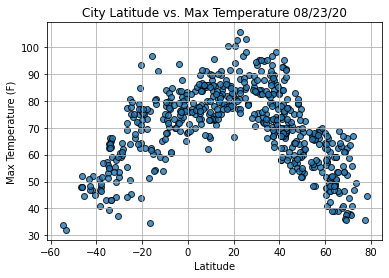

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

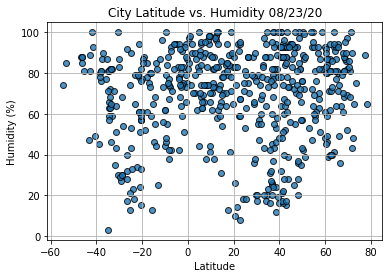

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

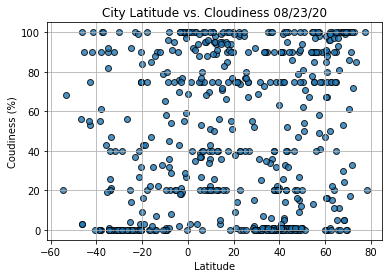

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Coudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

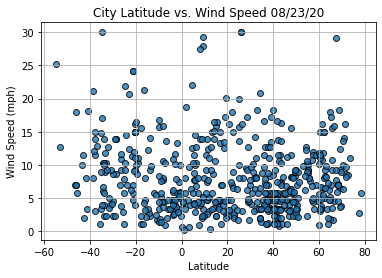

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

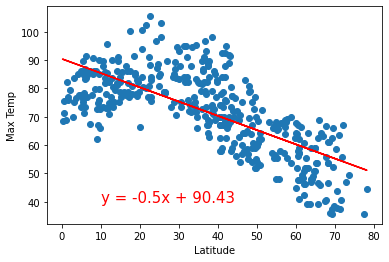

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

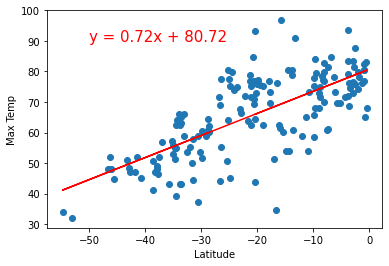

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

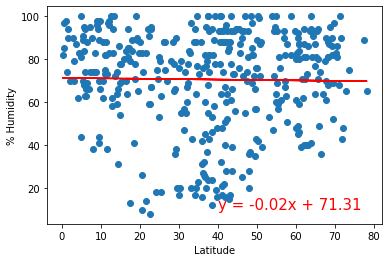

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

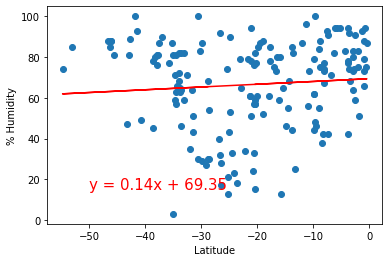

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

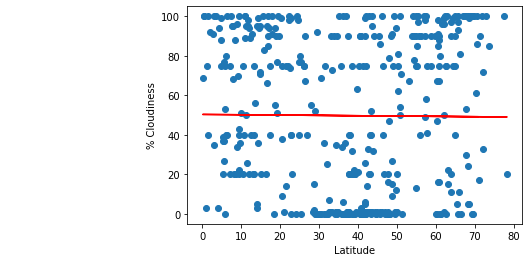

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

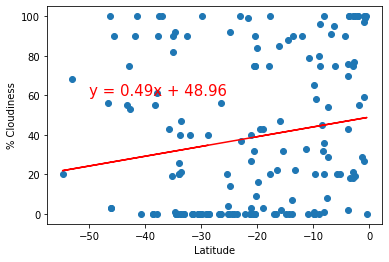

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

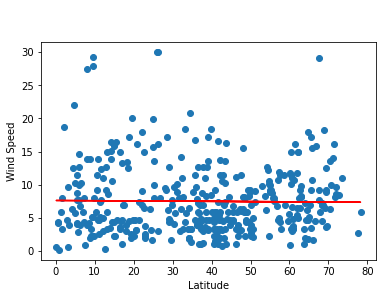

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

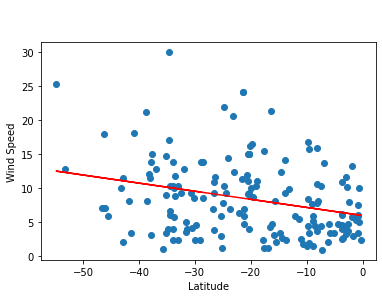

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))